# Data-Driven Music History

## Workshop at the *International Conference of Students of Systematic Musicology (SysMus)*

14 September 2020, 2-3:30 PM

Fabian C. Moss ([@fabianmoss](https://twitter.com/fabianmoss))<br />
Digital and Cognitive Musicology Lab<br />
École Polytechnique Fédérale de Lausanne

<img src="img/EPFL.png" width=200 align="left">
<img src="img/SNF.png" width=300 align="right">

**Abstract**

<p class="fragment fade-in">Traditionally, musicology has been divided into historical and systematic research agendas, encompassing qualitative-hermeneutic and quantitative-empirical methodologies, respectively. Innovations in the emerging and rapidly growing field of musical corpus studies question this fundamental divide and address, for instance, inherently historical questions with quantitative methods, fueled by the creation of ever larger and more appropriate datasets.</p>
<p class="fragment fade-in">
    This workshop first introduces some methodological and epistemological issues regarding empirical approaches to music history. It then presents a hands-on exercise on a case study. Finally, it invites critical discussion about the implications and relevance of the results for other subfields such as music psychology. In doing so, the workshop simulates (nearly) the entire life cycle of a research project, from an initial idea via selecting appropriate operationalisations and measures up to choosing suitable visualisations to communicate the results, e.g. in a research article or a blog post. At each point, participants will be invited to critically reflect the decisions taken. Along the way, more general methods for data analysis (e.g. data transformation, clustering, dimensionality reduction, and plotting) will be introduced. This is expected to benefit participants in a vast number of future projects.</p>

In [1]:
import pandas as pd # for working with tabular data
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt # for plotting
plt.style.use("fivethirtyeight") # select specific plotting style
import seaborn as sns; sns.set_context("talk")
import numpy as np

### Who am I?

- Music and Mathematics Education (University of Cologne, Germany)
- MA Musicology (University for Music and Dance, Cologne, Germany)
- started PhD in Musicology at Technical University, Dresden, Germany
- finished PhD in Digital Humanities at École Polytechnique Fédérale de Lausanne, Switzerland

### Who are you?

**Selected quotes**

"I am interested in the intersection of music theory, music cognition, and linguistics."
<p class="fragment fade-in">"I want to study more methods about dealing with data."</p>
<p class="fragment fade-in">"I am very interested in combining historic and systematic music research."</p>
<p class="fragment fade-in">"I'm interested in learning new methods regarding empirical approaches to music history"</p>
<p class="fragment fade-in">"it is interesting to know more about data  processing of symblic or audio music data"</p>
<p class="fragment fade-in">"I'm particularly interested in the quantitative-empirical methodologies. [...] I'm also interested in the balance between the qualitative and quantitative approach/methodology in research."</p>
<p class="fragment fade-in">"I am not familiar with many data analysis methods and would love to learn more about data-driven music history"</p>
<p class="fragment fade-in">"...learn more about Python and how it can be applied in a research."</p>

## Some caveats

- This is not an introduction to programming in Python
- Title of the workshop is "Data-Driven History of Music"
- We concentrate on a very specific example, not "Music" in general
- Focus on Western classical music and a specific representation of pieces

# 2 Outline 

1. This workshop
   1. Who am I 
   2. Who are you
   3. Technical aspects / interactivity / coding proficiency
2. Outline (You are here)
   1. Research Questions / Hypotheses
3. Data / Corpus
   1. Sources
   2. Encoding formats (pitch spelling)
   3. Scarcity problem
   4. Biases
4. Musical pieces as pitch-class distributions
   1. Vector-space model
5. Recovering the line of fifth from data
   1. Clustering
   2. Dimensionality reduction
      1. Method
      2. Results
      3. Interpretation of PCs (show first ranked)
      4. Operationalization: tonal center as proxy for tonality: coloring
      5. Using MuTh knowledge / models: explanation by LoF
      6. LoF-range as measure for tonality (diatonic/chromatic/enharmonic)
6. Historical Development of Tonality
      1. Line
      2. LOWESS
      3. Caution: historical trends 
7. Conclusion
8. Acknowledgements


## Research Questions

* General: How can we study historical changes quantitatively?
* Specific: What can we say about the history of tonality based on a dataset of musical pieces?

# 3 Data / Corpus

### 3.1 Music Encodings

There are many encodings for music. Some popular ones are

- sheet music
- MIDI
- MEI (Music Encoding Initiative)
- MusicXML
- kern**
- ...

### 3.2 Data Availability

- Describe the raw data (e.g. source: musescore.com
- MusicXML (pros and cons)
- conversion to list of notes
- DataFrame representation in the [Tonal Pitch-Class Counts Corpus (TP3C)](https://github.com/DCMLab/TP3C)

Note: Data basis for computational music history still poor

| source | composers | pieces  |
|--------|-----------|---------|
| IMSLP  | 19,490    | 163,974 |
| RISM   | 1,242,773 | 38,500  |
| TP3C   | 75        | 2,012   |

- IMSLP, RILM not readily available for computational analysis
- Number of composers is less a problem than it seems: power-law, not uniform!
- still, the TP3C relatively small

### 3.3 A (kind of) large corpus: TP3C

Here, we use a dataset that was specifically compiled for this kind of analysis, the [**Tonal pitch-class counts corpus (TP3C)**](https://github.com/DCMLab/TP3C) (Moss, Neuwirth, Rohrmeier, 2020)

- 2,012 pieces
- 75 composers
- approx. spans 600 years of music history
- does not contain complete pieces but only counts of tonal pitch-classes

In [2]:
import pandas as pd # to work with tabular data

url = "https://raw.githubusercontent.com/DCMLab/TP3C/master/tp3c.tsv"
data = pd.read_table(url)

data.sample(10)

,composer,composer_first,work_group,work_catalogue,opus,no,mov,title,composition,publication,source,display_year,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
17,Beethoven,Ludwig van,Piano Sonatas,Op.,28,NaN,1.0,Piano Sonata No. 15,1801.0,NaN,MS,1801.0,0,0,0,0,0,0,0,0,0,0,0,0,9,15,25,64,289,823,593,436,366,607,496,223,44,150,79,10,0,0,0,0,0,0,0
527,Brahms,Johannes,8 Klavierstücke,Op.,76,1,NaN,Capriccio,1878.0,NaN,DCML,1878.0,0,0,0,0,0,0,0,2,1,3,0,4,2,2,8,11,26,105,165,102,124,210,192,149,54,63,59,43,3,0,0,0,0,0,0
1832,Corelli,Arcangelo,12 Violin Sonatas,Op.,5,4,2.0,NaN,NaN,1700.0,CCARH,1700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,192,191,134,156,168,131,21,17,13,0,0,0,0,0,0,0,0,0,0,0,0
1697,Corelli,Arcangelo,12 Trio Sonatas,Op.,1,10,3.0,NaN,NaN,1681.0,CCARH,1681.0,0,0,0,0,0,0,0,0,0,0,0,4,32,47,42,59,122,115,63,19,4,19,5,0,0,0,0,0,0,0,0,0,0,0,0
1407,Scriabin,Alexander,Préludes,Op.,39,4,NaN,4 Preludes,1903.0,NaN,DCML,1903.0,0,2,0,0,1,7,1,20,3,6,21,30,19,17,10,29,10,7,10,22,4,2,10,5,0,0,0,0,0,0,0,0,0,0,0
1784,Corelli,Arcangelo,12 Trio Sonatas,Op.,4,3,1.0,NaN,NaN,1694.0,CCARH,1694.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,71,68,45,39,48,33,10,0,2,0,0,0,0,0,0,0,0
613,Debussy,Claude,Deux Arabesques,L.,66,NaN,2.0,NaN,1891.0,NaN,MS,1891.0,0,0,0,0,0,0,0,0,0,0,8,4,18,21,93,164,305,297,239,212,255,144,31,29,48,12,0,0,4,0,0,0,0,0,0
1872,Corelli,Arcangelo,12 concerti grossi,Op.,6,11,1.0,NaN,NaN,1714.0,CCARH,1714.0,0,0,0,0,0,0,0,0,0,0,0,0,47,107,156,132,101,99,93,32,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1410,Scriabin,Alexander,Préludes,Op.,48,3,NaN,4 Preludes,1905.0,NaN,DCML,1905.0,0,0,0,0,0,10,27,0,7,12,48,21,12,20,46,34,9,16,7,7,4,6,8,12,3,2,5,2,2,0,0,0,0,0,0
852,Rue,Pierre de la,Missa Assumpta est Maria,NaN,NaN,NaN,NaN,Gloria Tua,1485.0,NaN,ELVIS,1485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,14,17,14,17,7,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


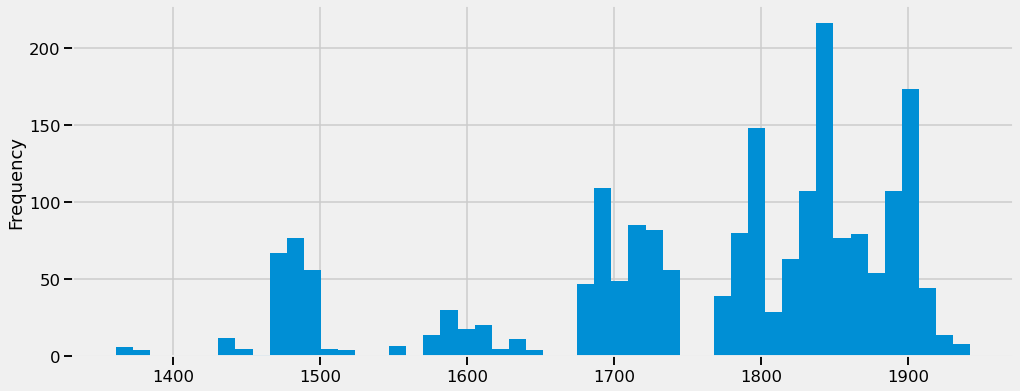

In [3]:
# historical overview
data.display_year.plot(kind="hist", bins=50, figsize=(15,6));

- it can be seen that there are large gaps and that some historical periods are underrepresented
- however, it is not so obvious how to fix that
- do we want a uniform distribution over time?
- do we want a "historically accurate" distribution?
- do we want to remove geographical/gender/class/instrument/etc. biases? 
- on one hand, balanced datasets are likely not to reflect historical realities
- on the other hand, such datasets rather represent the "canon", that is a contemporary selection of "valuable" compositions that may differ greatly from what was considered relevant at the time

--> There is no unique objective answer to these questions. It is important to be aware of these limitations and take them into account when interpreting the results

# 4 Musical pieces as tonal pitch-class distributions (Theory / Concepts)

In [4]:
note_names = list("FCGDAEB") # diatonic note names in fifths ordering
note_names

['F', 'C', 'G', 'D', 'A', 'E', 'B']

In [5]:
accidentals = ["bb", "b", "", "#", "##"] # up to two accidentals is suffient here
accidentals

['bb', 'b', '', '#', '##']

In [6]:
lof = [ n + a for a in accidentals for n in note_names ] # lof = "Line of Fifths"
print(lof)

['Fbb', 'Cbb', 'Gbb', 'Dbb', 'Abb', 'Ebb', 'Bbb', 'Fb', 'Cb', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C', 'G', 'D', 'A', 'E', 'B', 'F#', 'C#', 'G#', 'D#', 'A#', 'E#', 'B#', 'F##', 'C##', 'G##', 'D##', 'A##', 'E##', 'B##']


In [7]:
len(lof) # how long is this line-of-fifths segment?

35

In [8]:
tpc_counts = data.loc[:, lof] # select all rows (":") and the lof columns
tpc_counts.sample(20)

,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
1835,0,0,0,0,0,0,0,0,0,0,0,0,0,55,89,103,85,70,74,56,13,3,4,0,0,0,0,0,0,0,0,0,0,0,0
1453,0,0,0,0,0,0,0,0,0,0,0,0,0,6,10,43,60,141,176,213,142,207,258,161,47,69,23,13,1,4,0,0,0,0,0
1559,0,0,0,0,0,0,0,1,4,18,24,1,20,80,101,39,27,69,89,70,26,10,16,13,7,2,0,0,0,0,0,0,0,0,0
1338,0,0,0,0,0,0,0,0,0,0,0,0,0,15,135,261,242,315,375,288,208,42,30,40,0,0,0,0,0,0,0,0,0,0,0
1728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,164,80,13,5,92,6,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,4,19,59,150,202,110,78,203,179,46,4,0,14,2,1,0,0,0,0,0,0,0,0,0,0,0
1834,0,0,0,0,0,0,0,0,0,0,0,0,0,19,23,22,27,44,33,22,6,4,11,0,0,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,0,2,8,13,7,90,242,304,226,162,227,227,108,42,42,29,28,8,0,0,0,0,0,0,0,0,0
851,0,0,0,0,0,0,0,0,0,0,0,0,1,15,29,21,18,18,19,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1066,0,0,0,0,0,0,0,0,0,0,0,6,0,7,13,30,34,36,25,48,34,17,4,4,9,1,1,0,0,0,0,0,0,0,0


We probably have very long pieces (sonatas) and very short pieces (songs) in the dataset. Since we don't want length (or the absolute number of notes in a piece) to have an effect, we rather consider tonal pitch-class distributions instead counts, by normalizing all pieces to sum to one.

In [9]:
tpc_dists = tpc_counts.div(tpc_counts.sum(axis=1), axis=0)
tpc_dists.sample(20)

,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
1791,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103704,0.138272,0.079012,0.113580,0.172840,0.212346,0.079012,0.019753,0.024691,0.041975,0.009877,0.004938,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
959,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029730,0.113514,0.129730,0.118919,0.189189,0.205405,0.140541,0.062162,0.000000,0.008108,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072368,0.159774,0.226504,0.150376,0.028195,0.100564,0.083647,0.000940,0.000000,0.011278,0.033835,0.011278,0.020677,0.041353,0.032895,0.022556,0.000000,0.000000,0.003759,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010030,0.010030,0.020060,0.098295,0.175527,0.245737,0.095286,0.086259,0.121364,0.105316,0.023069,0.005015,0.000000,0.004012,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000756,0.000000,0.000756,0.000000,0.000000,0.002268,0.048375,0.125472,0.108844,0.077853,0.165533,0.208617,0.120937,0.046863,0.046863,0.031746,0.013605,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
159,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000287,0.003155,0.094091,0.129375,0.065118,0.121629,0.164372,0.172691,0.130235,0.022662,0.018646,0.062536,0.012622,0.002582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
361,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.001294,0.004743,0.012649,0.022855,0.026879,0.033348,0.087825,0.133391,0.125916,0.091706,0.093287,0.117579,0.116861,0.039385,0.020699,0.034354,0.026017,0.006468,0.000431,0.003162,0.000862,0.000287,0.0,0.0,0.0,0.0,0.0
828,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114286,0.128571,0.125000,0.146429,0.185714,0.171429,0.128571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
684,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001412,0.072034,0.159605,0.190678,0.176554,0.105932,0.149718,0.103107,0.026836,0.011299,0.002825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1907,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002538,0.000000,0.077411,0.156091,0.184010,0.135787,0.140863,0.161168,0.107868,0.021574,0.000000,0.012690,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


For further numerical analysis, we extract the data from this table and assign it to a variable `X`.

In [10]:
# extract values of table to matrix
X = tpc_dists.values

X.shape # shows (#rows, #columns) of X

(2012, 35)

Now, `X` is a 2012 $\times$ 35 matrix where the rows represent the pieces and the columns (also called "features" or "dimensions") represent the relative frequency of tonal pitch-classes.

Thinking in 35 dimensions is quite difficult for most people. Without trying to imagine what this would look like, what can we already say about this data?

Since each piece is a point in this 35-D space and pieces are represented as vectors, pieces that have similar tonal pitch-class distributions must be close in this space (whatever this looks like).

We could use so-called *clustering methods* to find out whether there are groups of pieces that cluster together.
E.g., maybe pieces of the same composer are similar to each other? Maybe pieces from a similar time? Maybe pieces for the same instruments?

If we find clusters, these would still be in 35-D and thus difficult to interpret. Luckily, there are a range of so-called *dimensionality reduction* methods that transform the data into lower-dimensional spaces so that we actually can look at them. 

A very common dimensionality reduction method is **Principal Components Analysis (PCA)**. 

The basic idea of PCA is:

- find dimensions in the data that maximize the variance in this direction
- these dimensions have to be orthogonal to each other (mutually independent)
- these dimensions are called the *principal components*
- each principal component is associated with how much of the data variance it explains

In [19]:
import numpy as np # for numerical computations
import sklearn
from sklearn.decomposition import PCA # for dimensionality reduction

pca = sklearn.decomposition.PCA(n_components=35) # initialize PCA with 35 dimensions
pca.fit(X) # apply it to the data
variance = pca.explained_variance_ratio_ # assign explained variance to variable

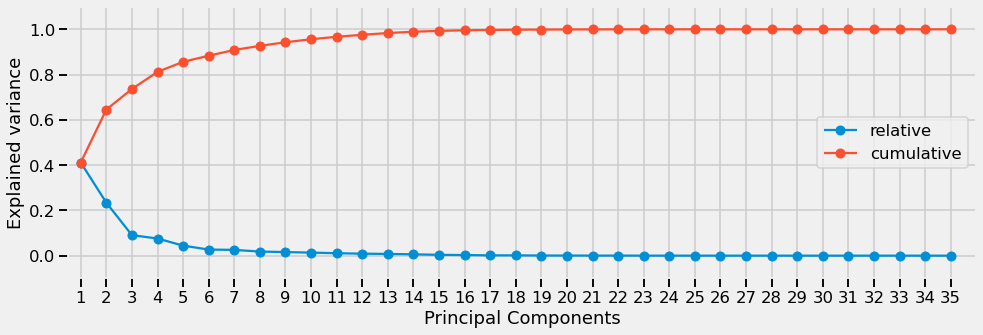

In [24]:
fig, ax = plt.subplots(figsize=(14,5))
x = np.arange(35)
ax.plot(x, variance, label="relative", marker="o")
ax.plot(x, variance.cumsum(), label="cumulative", marker="o")
ax.set_xlim(-0.5, 35)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained variance")
plt.xticks(np.arange(len(lof)), np.arange(len(lof)) + 1) # because Pyhon starts counting at 0

plt.legend(loc="center right")
plt.tight_layout()
plt.savefig("img/explained_variance.png")
plt.show()

![explained variance](img/explained_variance.png)

If the number of components is equal to the dimensionality of the data, principal component analysis rotates the data such that it its principal components are aligned with the coordinate axes.

In [28]:
variance[:5]

array([0.41144591, 0.23410347, 0.09063507, 0.07574242, 0.04436989])

The first principal component explains 41.1% of the variance of the data, the second explains 23.4% and the third 9%. Together, this amounts to 73.6%. 

Almost three quarters of the variance in the dataset is retained by reducing the dimensionality from 35 to 3 dimensions (8.6%)!
If we reduce the data to two dimensions, we still can explain $\approx$ 65% of the variance.

This is great because it means that we can look at the data in 2 or 3 dimensions without loosing too much information.

# 5 Recovering the Line of Fifths from Data

In [44]:
pca3d = PCA(n_components=3)
pca3d.fit(X)

X_ = pca3d.transform(X)
X_.shape

(2012, 3)

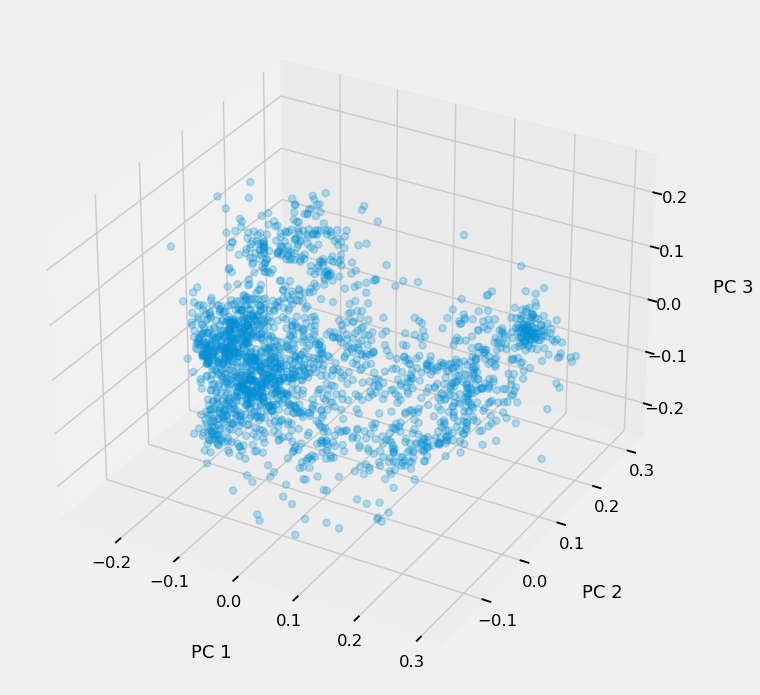

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_[:,0], X_[:,1], X_[:,2], s=50, alpha=.25) # c=cs,
ax.set_xlabel("PC 1", labelpad=30)
ax.set_ylabel("PC 2", labelpad=30)
ax.set_zlabel("PC 3", labelpad=30)

plt.tight_layout()
plt.show()

Each piece in this plot is represented by a point in 3D space. But remember that this location represents ~75% of the information contained in the full tonal pitch-class distribution.
In 35D space each dimension corresponded to the relative frequency of a tonal pitch-class in a piece.

- What do these three dimensions signify?
- How can we interpret them? 

Fortunately, we can inspect them individually and try to interpret what we see.

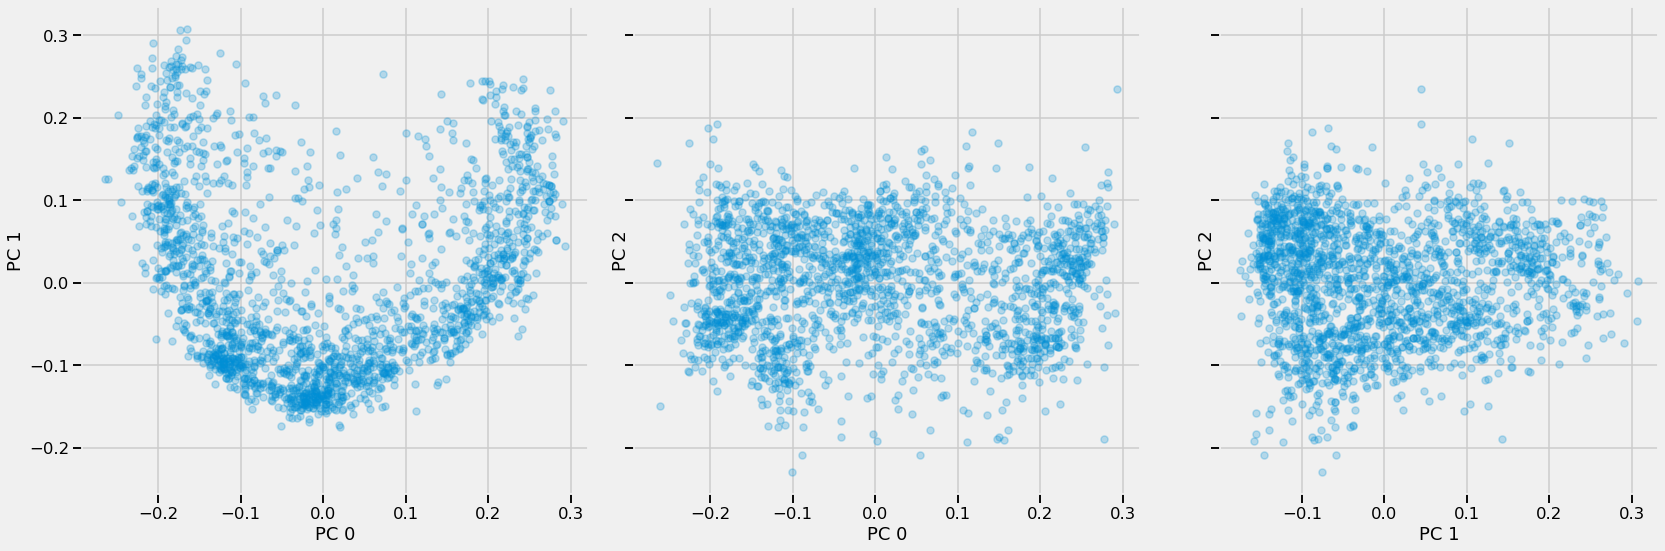

In [46]:
from itertools import combinations

fig, axes = plt.subplots(1,3, sharey=True, figsize=(24,8))

for k, (i, j) in enumerate(combinations(range(3), 2)):

    axes[k].scatter(X_[:,i], X_[:,j], s=50, alpha=.25, edgecolor=None)
    axes[k].set_xlabel(f"PC {i}")
    axes[k].set_ylabel(f"PC {j}")
    axes[k].set_aspect("equal")

plt.tight_layout()
plt.show()

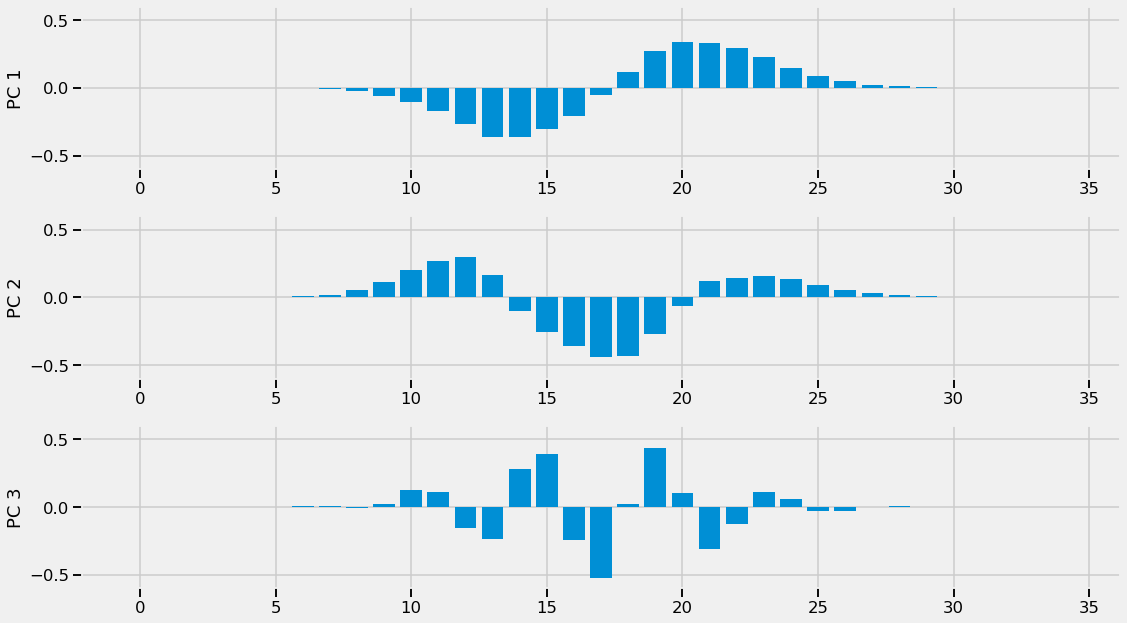

In [47]:
fig, axes = plt.subplots(3, figsize=(16,9))

for i in range(3):
    axes[i].bar(np.arange(35), pca.components_[i, :])
    axes[i].set_ylabel(f"PC {i + 1}")
    axes[i].set_ylim(-.6,.6)

plt.tight_layout()

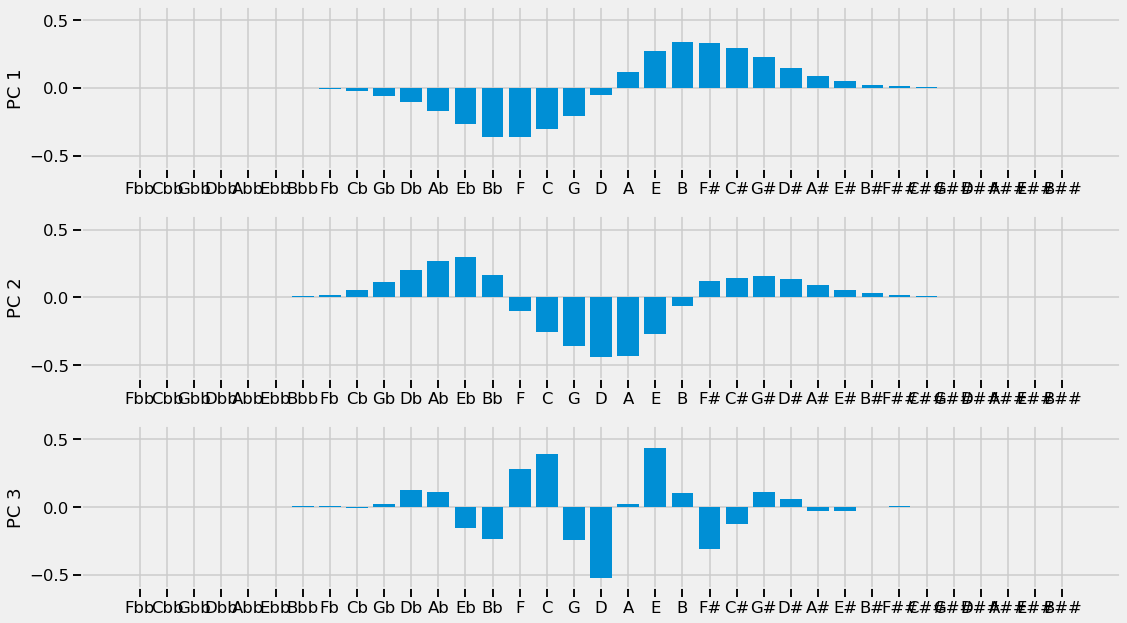

In [48]:
fig, axes = plt.subplots(3, figsize=(16,9))

for i in range(3):
    axes[i].bar(np.arange(35), pca.components_[i, :])
    axes[i].set_xticks(np.arange(35))
    axes[i].set_xticklabels(lof)
    axes[i].set_ylabel(f"PC {i + 1}")
    axes[i].set_ylim(-.6,.6)
    
plt.tight_layout()

It seems clear that the line of fifths play a central role in the organization of pitch-class distributions. 

But in our 3D and 2D spaces each piece is just shown as one point. How can we summarize its distribution?

As always, many different options are available. For the present purpose we will use the most simple summary of the piece: its most frequent note (which is the *mode* of its pitch-class distribution in statistical terms) and call this note its **tonal center**.

In [49]:
tpc_dists["tonal_center"] = tpc_dists.apply(lambda piece: np.argmax(piece[lof].values) - 15, axis=1)
tpc_dists.sample(10)

,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##,tonal_center
360,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101744,0.459302,0.159884,0.055233,0.043605,0.162791,0.017442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-2
138,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000540,0.000000,0.000540,0.008104,0.034036,0.032955,0.035116,0.091842,0.141005,0.120475,0.141005,0.112912,0.112372,0.099946,0.029173,0.010805,0.015127,0.010805,0.003241,0.0,0.0,0.0,0.0,0.0,4
1232,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013556,0.027112,0.050052,0.017727,0.089677,0.174140,0.271116,0.131387,0.065693,0.069864,0.057351,0.032325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2
1154,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032166,0.119371,0.125804,0.116512,0.210150,0.179414,0.132952,0.068620,0.001430,0.012866,0.000715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2
1448,0.0,0.0,0.0,0.0,0.0,0.000000,0.000575,0.004025,0.017251,0.003450,0.090857,0.155837,0.232892,0.125934,0.076481,0.121334,0.091432,0.029902,0.024727,0.009776,0.010926,0.003450,0.001150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-3
109,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000668,0.016700,0.086172,0.113560,0.111556,0.125585,0.157649,0.156981,0.120240,0.047428,0.022044,0.021376,0.018036,0.002004,0.000000,0.0,0.0,0.0,0.0,0.0,6
1076,0.0,0.0,0.0,0.0,0.0,0.002058,0.000000,0.006173,0.014403,0.045267,0.054527,0.049383,0.085391,0.176955,0.163580,0.054527,0.074074,0.122428,0.069959,0.039095,0.012346,0.013374,0.010288,0.004115,0.002058,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-2
606,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059524,0.059524,0.061905,0.235714,0.161905,0.147619,0.104762,0.057143,0.054762,0.045238,0.007143,0.004762,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
306,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014754,0.080328,0.131148,0.165574,0.147541,0.132787,0.098361,0.108197,0.068852,0.024590,0.027869,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2
558,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.080000,0.187500,0.162500,0.180000,0.090000,0.117500,0.115000,0.040000,0.010000,0.007500,0.000000,0.002500,0.002500,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0


This will also allow to map the tonal pitch-classes on the line of fifths to colors.

![Line of fifths coloring](img/lof.png)

In [50]:
from matplotlib import cm
from matplotlib.colors import Normalize

#normalize item number values to colormap
norm = Normalize(vmin=-15, vmax=20)

# cs = [ cm.seismic(norm(c)) for c in data["tonal_center"]]
cs = [ cm.seismic(norm(c)) for c in tpc_dists["tonal_center"]]

It seems as if the first three (or maybe only two?) principal components contain a lot of structure. 
Recall that the tonal pitch-class counts in the original `data` were ordered along the line of fifths! Let us map the x-axis to the line of fifths.

This now allows for a very clear interpretation of the three first principal components:

1. The first component represents the two directions on the line of fifths: flatward (to the left) and sharpward (to the right).
2. The second component represents the number of accidentals: one flat/or sharp has positive values, no accidentals has negative values. More than that is probably so rare that it is not contained in the reduced space (lost information)
3. The third component is somewhat harder to interpet and appears to show a less clear picture. Let's focus on D. Similar values are shared by G (the perfect fifths below), Bb (the major third below), F# the major third above, and to a lesser degree Eb (the diatonic semitone above) and C# (the diatonic semitone below). Note that Db and D#, the enharmonic equivalents to NOT have high values!

Do the observations only hold for D? No, also for C! The fifth below (F) and the two major thirds (Ab, E), as well as the semitones (Db, B) exhibit the same pattern. 

- Note that the diatonic semitones are the perfect fifths to the major thirds! Here we see, in nucleo, a two-dimensional structure appearing, the *Tonnetz*.

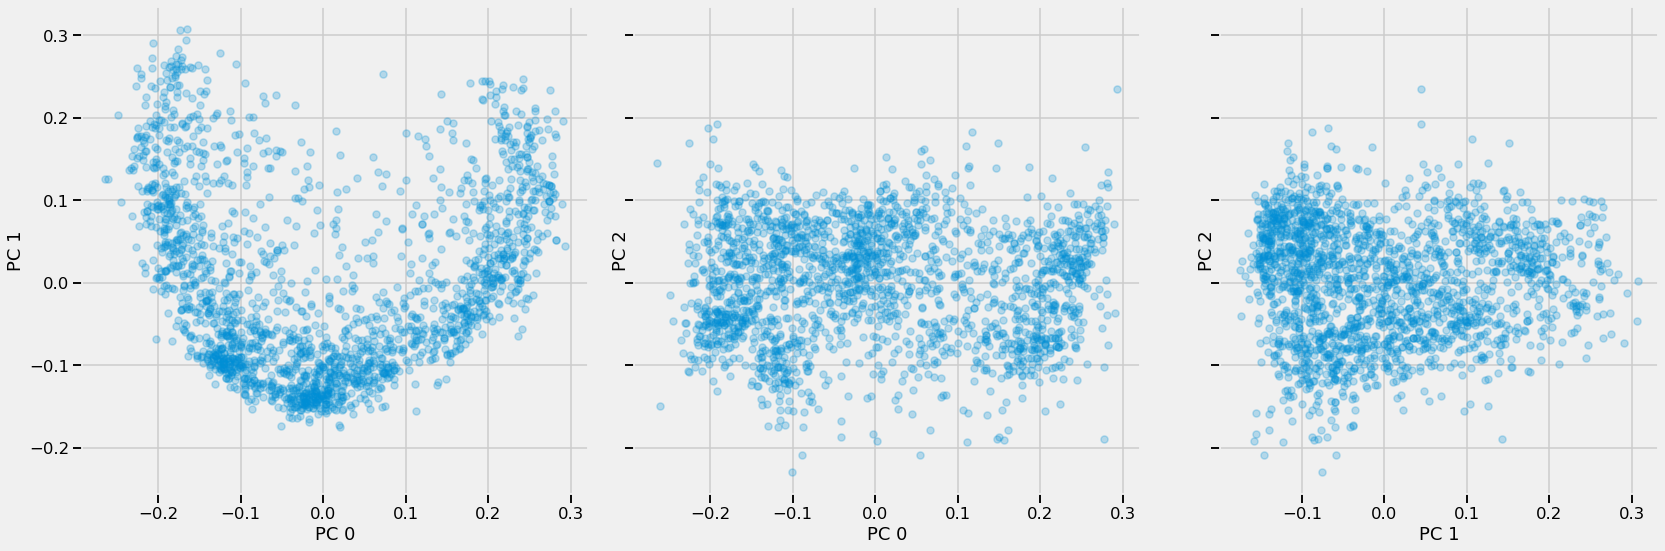

In [59]:
from itertools import combinations

fig, axes = plt.subplots(1,3, sharey=True, figsize=(24,8))

for k, (i, j) in enumerate(combinations(range(3), 2)):

    axes[k].scatter(X_[:,i], X_[:,j], s=50, alpha=.25, edgecolor=None)
    axes[k].set_xlabel(f"PC {i}")
    axes[k].set_ylabel(f"PC {j}")
    axes[k].set_aspect("equal")

plt.tight_layout()
plt.savefig("img/3d_dimension_pairs.png")
plt.show()

![Dimension pairs](img/3d_dimension_pairs.png)

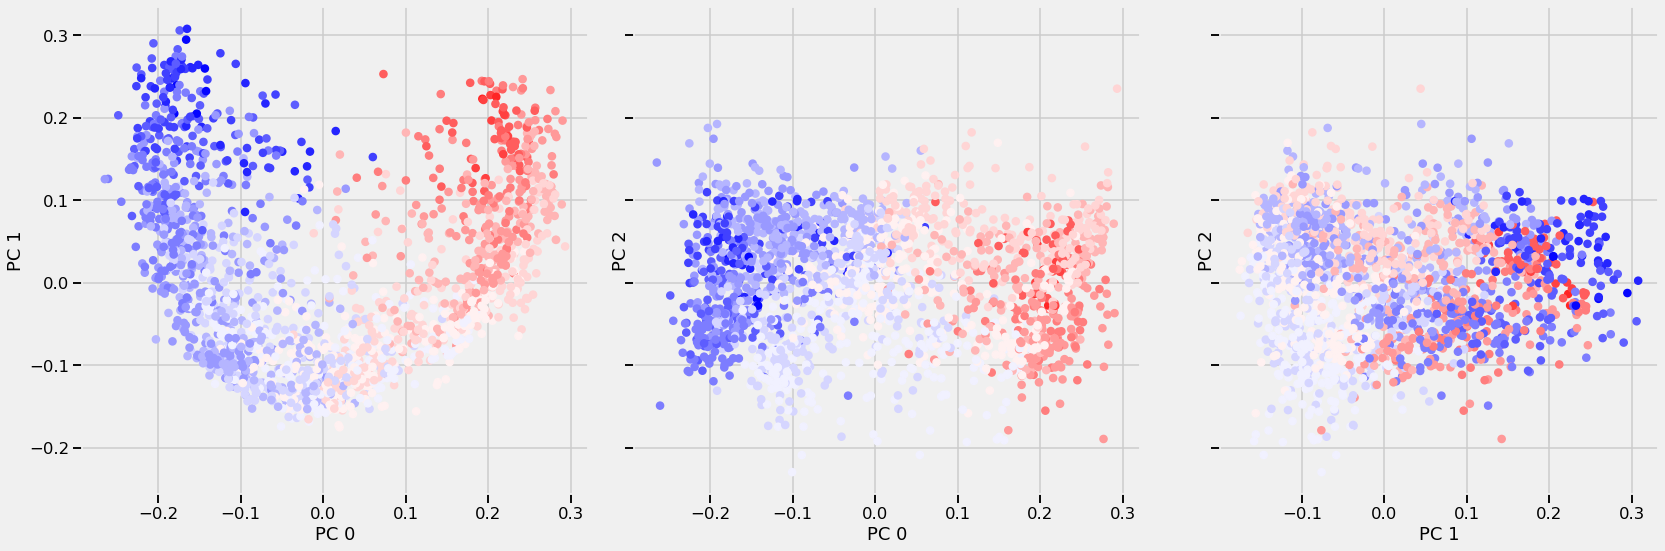

In [60]:
from itertools import combinations

fig, axes = plt.subplots(1,3, sharey=True, figsize=(24,8))

for k, (i, j) in enumerate(combinations(range(3), 2)):

    axes[k].scatter(X_[:,i], X_[:,j], s=50, c=[ np.abs(c) for c in cs], edgecolor=None)
    axes[k].set_xlabel(f"PC {i}")
    axes[k].set_ylabel(f"PC {j}")
    axes[k].set_aspect("equal")

plt.tight_layout()
plt.savefig("img/3d_dimension_pairs_colored.png")
plt.show()

![Dimension pairs colored](img/3d_dimension_pairs_colored.png)

# 6 Historical Development of Tonality

We have established that tonal spaces (the line of fifths, the Tonnetz) are important underlying structures for pitch-class distributions in tonal compositions.
But we have treated all pieces in our dataset as synchronic and have not taken their historical location into account.

Let's look at random pieces on the line of fifths:

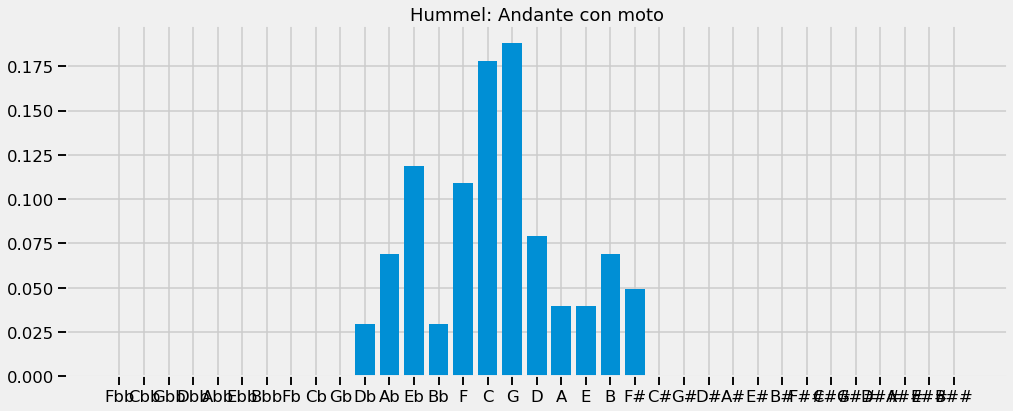

In [53]:
import random

rand = random.randint(0, 2012)

piece = tpc_dists.iloc[rand, :-1]

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(np.arange(35), piece)
ax.set_xticks(np.arange(35))
ax.set_xticklabels(lof)

ax.set_title(f"{data.loc[rand, 'composer']}: {data.loc[rand, 'title']}")
plt.show()

# ax.set_title(f"{composer}: {title}" for composer, title in data.loc[rand, ["composer", "title"]].values );

It is not too far fetched to say that virtually all pieces cluster together in a more or less narrow range on the line of fifths. But some spread wider than others. 
Let us use this observation and introduce a simple measure, the line-of-fifths range $r$ of a piece that is defined as the number of fifths between highest ("sharpest") and the lowest ("flattest") tonal pitch class that a piece contains. For example, a piece that only contains black notes (on the piano, and only spelled with either sharps of flats) has Bb as its sharpest and Gb as its flattest note. Accordingly, their range is 

$$ r = |lof(Bb) - lof(Gb)| = |-2 - (-6)| = 4$$

A piece that only contains black notes, spans five notes that are separated by four perfect fifths. This scale is called *pentatonic*.

We can not determine the lof-range for each piece in the corpus.

In [54]:
def lof_range(piece):
    l = [i for i, v in enumerate(piece) if v!=0]
    return max(l) - min(l)

In [55]:
lof_range(piece)

11

In [56]:
data["lof_range"] = data.loc[:, lof].apply(lof_range, axis=1)
data.sample(15)

,composer,composer_first,work_group,work_catalogue,opus,no,mov,title,composition,publication,source,display_year,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##,lof_range
504,Gesualdo,Carlo,Il sesti libri di madrigali,NaN,NaN,NaN,NaN,Beltà pio che t'assenti,NaN,1611.0,CPDL,1611.0,0,0,0,0,0,0,0,0,0,0,1,9,37,60,62,55,74,88,69,32,31,21,8,9,3,1,1,0,0,0,0,0,0,0,0,16
1078,Lyapunov,Sergei Mikhailovich,7 Preludes,Op.,6,6,NaN,NaN,1896.0,NaN,MS,1896.0,0,0,0,0,0,0,2,6,6,21,39,105,60,59,99,129,68,22,2,26,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,15
435,Alkan,Charles Valentin,Deuxième Recueil d'Impromptus,Op.,32,2,4,NaN,NaN,1849.0,MS,1849.0,0,0,0,0,0,0,0,0,0,4,4,36,69,25,62,154,76,117,132,167,102,48,37,61,24,2,0,8,0,0,0,0,0,0,0,18
1068,Rachmaninoff,Sergei,10 Préludes,Op.,23,1,NaN,NaN,1903.0,NaN,MS,1903.0,0,0,0,0,0,0,0,0,0,0,0,3,2,4,16,10,40,145,171,56,119,266,186,84,24,29,55,39,4,0,0,0,0,0,0,17
1534,Alkan,Charles Valentin,Une petite Pièce pour Piano,Op.,60,2,NaN,Ma Chère Servitude,1859.0,NaN,MS,1859.0,0,0,0,0,0,0,0,0,4,0,6,20,2,20,155,260,124,254,423,544,342,143,148,207,119,21,20,37,2,0,2,1,0,0,0,23
346,Beethoven,Ludwig van,Piano Sonatas,Op.,26,NaN,2.0,Piano Sonata No. 12,1801.0,NaN,MS,1801.0,0,0,0,0,0,0,0,2,3,24,100,114,71,103,70,99,84,20,17,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
1620,Chopin,Frédéric,Mazurkas,Op.,17,4,NaN,NaN,1832.0,1834.0,CCARH,1832.0,0,0,0,0,0,0,0,0,0,0,0,7,12,12,154,115,72,210,285,303,189,71,68,80,40,24,0,2,0,0,0,0,0,0,0,16
1330,Schumann,Robert,Liederkreis,Op.,39,2,NaN,Intermezzo,1840.0,1842.0,OSLC,1840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,21,92,95,101,106,75,86,38,17,10,10,3,2,0,0,0,0,0,0,14
1558,Wolf,Hugo,Eichendorff-Lieder,NaN,NaN,14,NaN,Der verzweifelte Liebhaber,NaN,1889.0,OSLC,1889.0,0,0,0,0,0,0,0,0,6,30,8,22,71,78,33,71,82,86,40,14,16,25,4,3,4,2,0,0,0,0,0,0,0,0,0,17
1382,Scriabin,Alexander,Préludes,Op.,17,7,NaN,7 Preludes,1896.0,NaN,DCML,1896.0,0,0,0,0,0,0,0,1,17,20,27,61,112,97,28,67,116,98,47,8,31,41,13,6,0,0,0,0,0,0,0,0,0,0,0,16


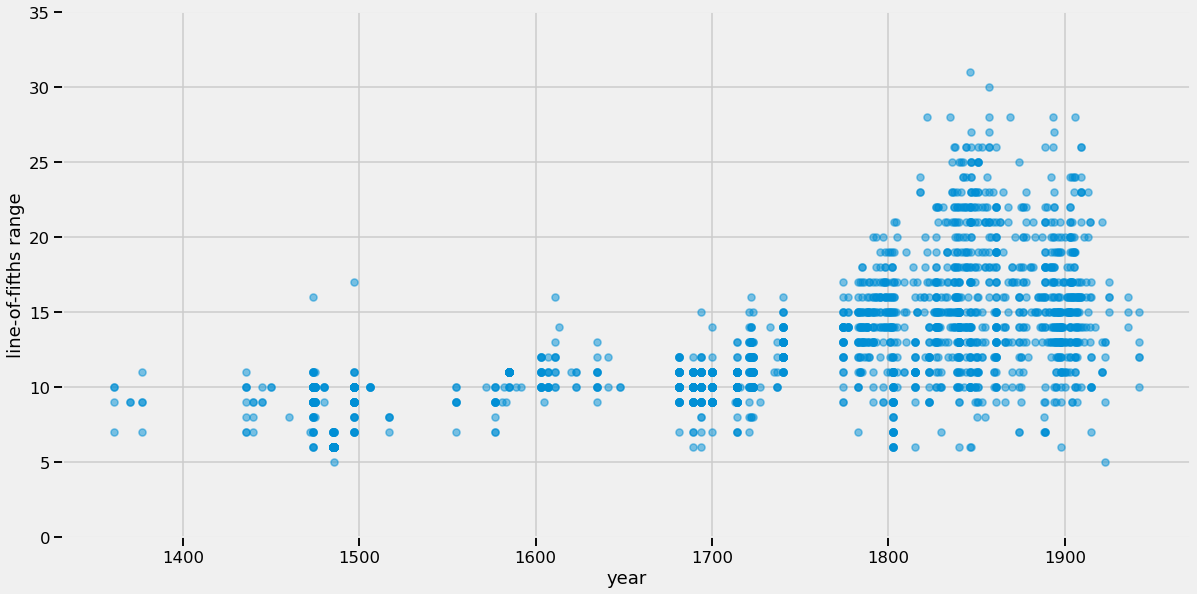

In [57]:
fig, ax = plt.subplots(figsize=(18,9))
ax.scatter(data["display_year"].values, data["lof_range"].values, alpha=.5, s=50)
ax.set_ylim(0,35)
ax.set_xlabel("year")
ax.set_ylabel("line-of-fifths range");

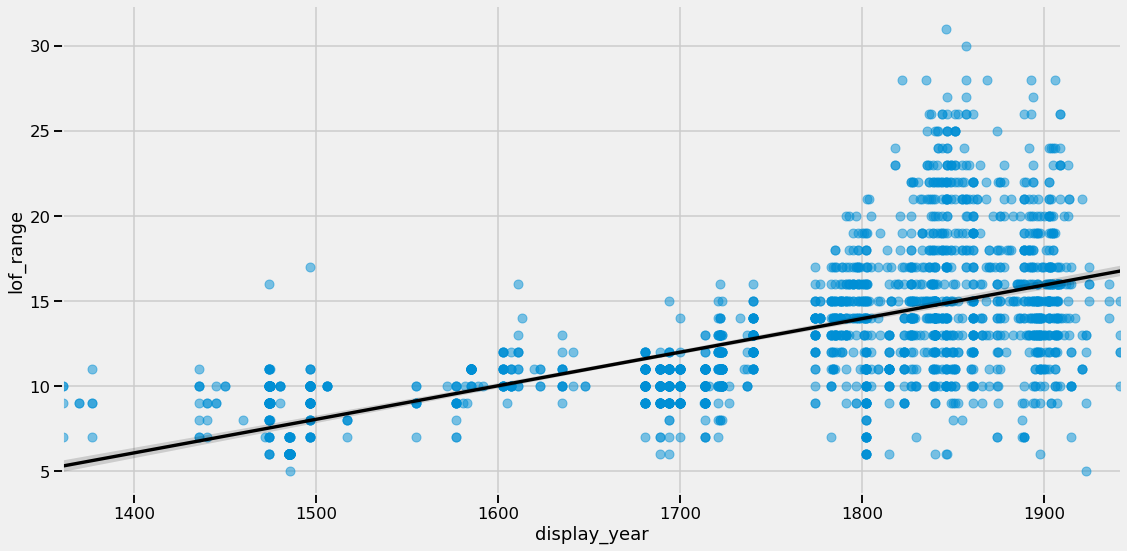

In [58]:
sns.lmplot(
    data=data, 
    x="display_year", 
    y="lof_range", 
    line_kws={"color":"k"},
    scatter_kws={"alpha":.5},
#     lowess=True,
    height=8,
    aspect=2
);

#### Attention with single trendlines (--> models)
#### LOWESS curves

We use *Locally Weighted Scatterplot Smoothing* (LOWESS; Cleveland and Devlin, 1988) to
show historical trends in the distribution of fifths ranges. LOWESS fits a local polynomial
regression not to the entire dataset but to a neighborhood of each data point $x_0$ that is determined
by a fraction parameter defining what percentage of the whole data is taken into account
when calculating the regressions. The larger this fraction is the smoother the resulting lowess
curve will be. Here, this parameter was set to $\delta=.15$. Note that the range of years covered by
the neighborhood can vary, depending on how the data is distributed over time. In periods
with fewer pieces, a larger time range will be taken into account and vice versa. This is why the
lines are much smoother before ca. 1700 and show much more variability in later decades and
centuries. The weights for this regression are chosen so that they give less weight to data points
further away from $x_0$. A commonly used weighting function is the so-called tricube function,
$w(x_i) = (1 - |x_i - x_0|^3)^3$.

--> no need to decide for a specific polynomial. LOWESS locally fits polyninomials of different degrees

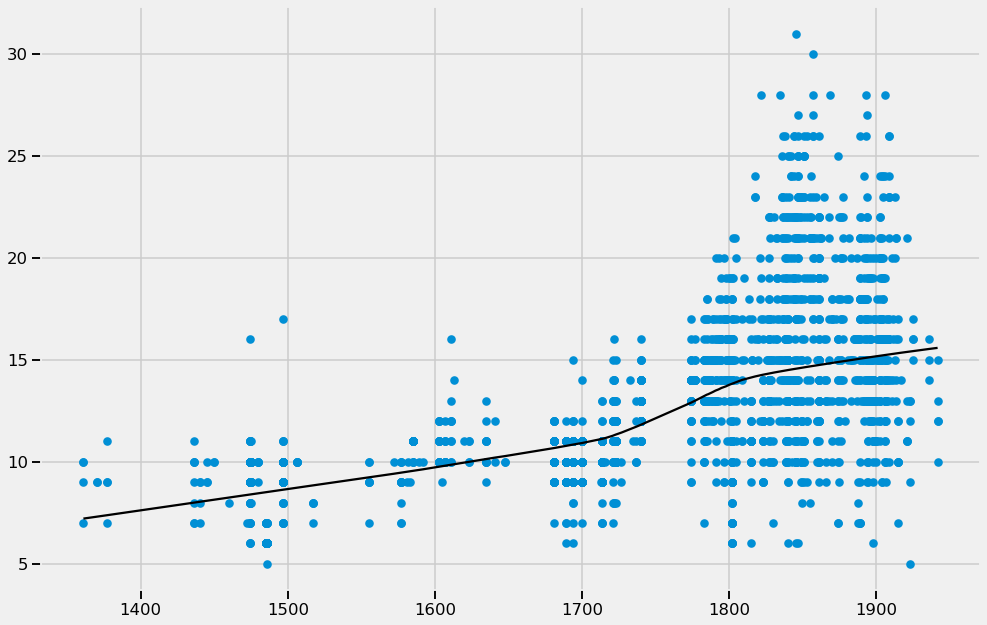

In [65]:
from statsmodels.nonparametric.smoothers_lowess import lowess

x = data.display_year
y = data.lof_range
l = lowess(y,x)

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x,y, s=50)
ax.plot(l[:,0], l[:,1], c="k")

plt.show()

**!! ==> History is not a time series!!**

#### Bootstrapping the data to estimate the variance

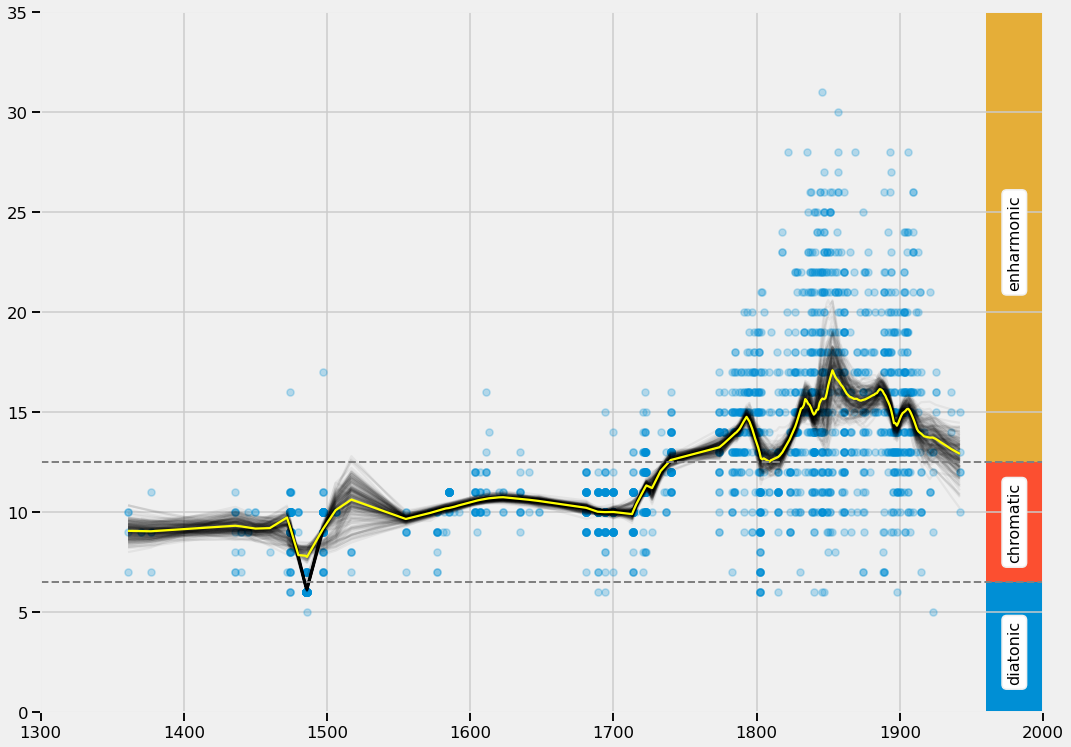

In [33]:
B = 200
delta = 1/10 

fig, ax = plt.subplots(figsize=(16,12))

x = data.display_year
y = data.lof_range
l = lowess(y,x, frac=delta)

ax.scatter(x,y, s=50, alpha=.25)

for _ in range(B):
    resampled = data.sample(data.shape[0], replace=True)
    
    xx = resampled.display_year
    yy = resampled.lof_range
    ll = lowess(yy,xx, frac=delta)
    
    ax.plot(ll[:,0], ll[:,1], c="k", alpha=.05)
    
ax.plot(l[:,0], l[:,1], c="yellow")

## REGIONS
from matplotlib.patches import Rectangle

text_kws = {
    "rotation" : 90,
    "fontsize" : 16,
    "bbox" : dict(
        facecolor="white", 
        boxstyle="round"
    ),
    "horizontalalignment" : "center",
    "verticalalignment" : "center"
}

rect_props = {
    "width" : 40,
    "zorder" : -1,
    "alpha" : 1.
}

stylecolors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

ax.text(1980, 3, "diatonic", **text_kws)
ax.axhline(6.5, c="gray", linestyle="--", lw=2) # dia / chrom.
ax.add_patch(Rectangle((1960,0), height=6.5, facecolor=stylecolors[0], **rect_props))

ax.text(1980, 9.5, "chromatic", **text_kws)
ax.axhline(12.5, c="gray", linestyle="--", lw=2) # chr. / enh.
ax.add_patch(Rectangle((1960,6.5), height=6, facecolor=stylecolors[1], **rect_props))

ax.text(1980, 23.5, "enharmonic", **text_kws)
ax.add_patch(Rectangle((1960,12.5), height=28, facecolor=stylecolors[2], **rect_props))

ax.set_ylim(0,35)
ax.set_xlim(1300,2000)
plt.savefig("img/final.png", dpi=300)
plt.show()

![Final Result](img/final.png)

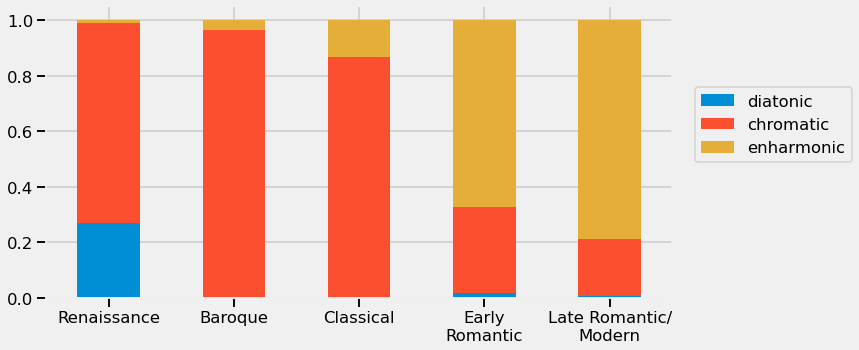

In [66]:
epochs = {
    "Renaissance" : [1300, 1549],
    "Baroque" : [1550, 1649],
    "Classical" : [1650, 1749],
    "Early\nRomantic" : [1750, 1819],
    "Late Romantic/\nModern" : [1820, 2000]
}   

strata = [
    "diatonic",
    "chromatic",
    "enharmonic"
]

widths = data[["display_year", "lof_range"]].sort_values(by="display_year").reset_index(drop=True)

df = pd.concat(
    [
        widths[ 
            (widths.display_year >= epochs[e][0]) & (widths.display_year <= epochs[e][1]) 
        ]["lof_range"].value_counts(normalize=True).sort_index().groupby( 
            lambda x: strata[0] if x <= 6 else strata[1] if x <= 12 else strata[2]
        ).sum() for e in epochs
    ], axis=1, sort=True
)

df.columns = epochs.keys()
df = df.reindex(strata)
df.T.plot(kind="bar", stacked=True, figsize=(10,5))
# plt.title("Epochs")
plt.legend(bbox_to_anchor=(1.3,0.75))
plt.gca().set_xticklabels(epochs.keys(), rotation="horizontal")
# plt.tight_layout()
plt.show()

- Renaissance: largest diatonic proportion but mostly chromatic: ficta
- Baroque: alost completely chromatic
- Classical: enharmonic proportion increases -> more distant modulations
- This trend continues through the Romantic eras

# 7 Summary

<p>1. We have analyzed a very specific aspect of Western classical music.</p>
<p class="fragment fade-in">2. We have used a large(-ish) corpus to answer our research question.</p>
<p class="fragment fade-in">3. We have operationalized musical pieces as vectors that represent distributions of tonal pitch-classes.</p>
<p class="fragment fade-in">4. We have used the dimensionality-reduction technique Principal Component Analysis (PCA) in order to visually inspect the distribution of the data in 2 and 3 dimensions.</p>
<p class="fragment fade-in">5. We have used music-theoretical domain knowledge to find meaningful structure in this space.</p>
<p class="fragment fade-in">6. We have seen that pieces are largely distributed along the line of fifths.</p>
<p class="fragment fade-in">7. We have used Locally Weighted Scatterplot Smoothing (LOWESS) to estimate the variance in this historical process.</p>
<p class="fragment fade-in">8. We have seen that, historically, composers explore ever larger regions on this line and that the variance also increases.</p>


# 8 Conclusion

1. Data-driven approaches to music analysis offer new ways of studying music history.
2. One of the largest obstacles is the lack of appropriate data <div class="fragment fade-in">(maybe you could help improve the situation?)</div>
3. It is difficult to operationalize/formalize musical concepts.
4. Good news: there is a lot to be done for Master/PhD students!

# 9 The end

- Thank you very much for participating in this workhop
- I would appreciate it if you would send me some feedback (mail: [fabian.moss@epfl.ch](mailto:fabian.moss@epfl.ch); Twitter: [@fabianmoss](https://twitter.com/fabianmoss))
- Please get in touch if you are interested in working on a small project
- Special thanks to Diana Kayser for organization and making everyhing possible!!!
- My funding: École Polytechnique Fédérale de Lausane (EPFL) and Swiss National Science Foundation (SNSF)


# Have a great SysMus 2020!

![Have fun!](img/giphy.gif)